In [45]:
import numpy as np
import pandas as pd

In [46]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [47]:
df=pd.read_csv('CSGOComplete.csv',index_col=0)

In [48]:
df.head()

,Day,Month,Year,Date,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
Map,,,,,,,,,,,,,,,,
Mirage,3,8,2018,3/8/2018,327,2906,16,13,215,17,2,21,2,5,45,Win
Mirage,2,8,2018,2/8/2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
Mirage,31,7,2018,31/7/2018,414,2731,16,14,85,15,3,18,3,26,37,Win
Mirage,31,7,2018,31/7/2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
Mirage,30,7,2018,30/7/2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1133 entries, Mirage to Dust II
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Day             1133 non-null   int64 
 1   Month           1133 non-null   int64 
 2   Year            1133 non-null   int64 
 3   Date            1133 non-null   object
 4   Wait Time(s)    1133 non-null   int64 
 5    Match Time(s)  1133 non-null   int64 
 6   Team A Rounds   1133 non-null   int64 
 7   Team B Rounds   1133 non-null   int64 
 8   Ping            1133 non-null   int64 
 9   Kills           1133 non-null   int64 
 10  Assists         1133 non-null   int64 
 11  Deaths          1133 non-null   int64 
 12  Mvp's           1133 non-null   int64 
 13  HS%             1133 non-null   int64 
 14  Points          1133 non-null   int64 
 15  Result          1133 non-null   object
dtypes: int64(14), object(2)
memory usage: 150.5+ KB


In [50]:
df.describe()

,Day,Month,Year,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,16.598411,7.069726,2016.330980,118.533098,2291.438658,12.393645,12.269197,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123
std,8.711933,3.302142,1.112443,134.129684,474.524327,4.539815,4.509403,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022
min,1.000000,1.000000,2015.000000,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,4.000000,2015.000000,9.000000,1942.000000,9.000000,9.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000
50%,18.000000,7.000000,2017.000000,48.000000,2311.000000,15.000000,15.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000
75%,24.000000,10.000000,2017.000000,213.000000,2648.000000,16.000000,16.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000
max,31.000000,12.000000,2018.000000,589.000000,3603.000000,16.000000,16.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000


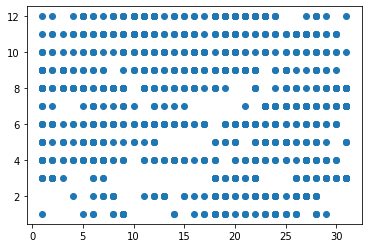

In [51]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [52]:
df.columns

Index(['Day', 'Month', 'Year', 'Date', 'Wait Time(s)', ' Match Time(s)',
       'Team A Rounds', 'Team B Rounds', 'Ping', 'Kills', 'Assists', 'Deaths',
       'Mvp's', 'HS%', 'Points', 'Result'],
      dtype='object')

In [53]:
from sklearn.cluster import KMeans

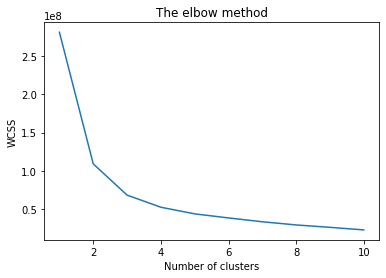

In [72]:
wcss=[]
x=df.drop(['Day', 'Month', 'Year', 'Date','Result'],axis=1)
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [88]:
kmeans = KMeans(n_clusters = 2)
x

,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points
Map,,,,,,,,,,,
Mirage,327,2906,16,13,215,17,2,21,2,5,45
Mirage,336,2592,16,11,199,13,4,24,2,0,40
Mirage,414,2731,16,14,85,15,3,18,3,26,37
Mirage,317,2379,11,16,93,12,2,15,2,16,30
Mirage,340,3467,15,15,94,33,5,20,5,30,83
...,...,...,...,...,...,...,...,...,...,...,...
Dust II,2,1573,16,4,46,12,2,20,0,16,26
Dust II,29,2126,16,8,41,19,6,21,2,31,51
Dust II,10,2555,11,16,17,9,3,20,2,55,30


In [83]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [84]:
kmeans.cluster_centers_

array([[9.94522293e+01, 1.69687580e+03, 1.00095541e+01, 9.55095541e+00,
        6.59713376e+01, 1.10891720e+01, 3.18152866e+00, 1.31496815e+01,
        1.35031847e+00, 2.39203822e+01, 2.93375796e+01],
       [1.38135870e+02, 2.81446739e+03, 1.45000000e+01, 1.42500000e+01,
        7.70815217e+01, 1.76630435e+01, 5.01630435e+00, 2.01630435e+01,
        2.27989130e+00, 2.47608696e+01, 4.76114130e+01],
       [1.15822616e+02, 2.27861863e+03, 1.23348115e+01, 1.25454545e+01,
        7.32926829e+01, 1.48115299e+01, 4.13968958e+00, 1.71862528e+01,
        1.78492239e+00, 2.57006652e+01, 3.92461197e+01]])

In [85]:
kmeans.labels_

array([1, 1, 1, ..., 1, 2, 0])

In [86]:
y_kmeans = model.fit_predict(x)
y_kmeans 

array([1, 1, 1, ..., 1, 0, 2])

In [87]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'win')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'tie')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'loose')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

TypeError: '(array([False, False, False, ..., False,  True, False]), 0)' is an invalid key